In [1]:
################################################################################
# CS 156a Bonus Exercise
# Author: Aadyot Bhatnagar
# Last modified: October 27, 2018
# Description: A script to load and evaluate a saved Keras model's performance
#              on the MNIST dataset of handwritten images. Prints out training
#              and validation loss and accuracy, and also visualizes validation
#              images the model got wrong.
################################################################################

import os
import argparse
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import model_from_json
from keras.datasets import mnist

In [2]:
## Parse command line arguments
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('-m', '--model-name',
        help='prefix for saved trained model we want to evaluate ' +
            '(e.g. dense_arch1, conv_regularize05, etc.)',
        required=True)
    return parser.parse_args()

## Get data in a format compatible with the neural net we want to evaluate
def get_data(model):
    # Import the MNIST dataset using Keras
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Determine input shape that the model given should take
    input_shape = model.get_layer(index=0).input_shape

    # Normalize data to be in [0, 1] and reshape appropriately
    X_train = X_train.reshape(-1, *input_shape[1:]) / 255
    X_test = X_test.reshape(-1, *input_shape[1:]) / 255

    # Convert labels to one-hot vectors (probability distributions w/
    # probability 1 assigned to the correct label)
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)

    return (X_train, y_train), (X_test, y_test)

dense_2layers_40_25

Training loss: 0.06958469748497009
Training accuracy: 0.9788833260536194

Validation loss: 0.10984301567077637
Validation accuracy: 0.9668999910354614


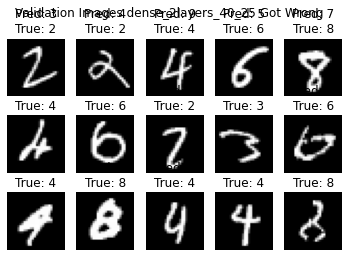

dense_2layers_40_30

Training loss: 0.05828108638525009
Training accuracy: 0.9827166795730591

Validation loss: 0.10766113549470901
Validation accuracy: 0.9674999713897705


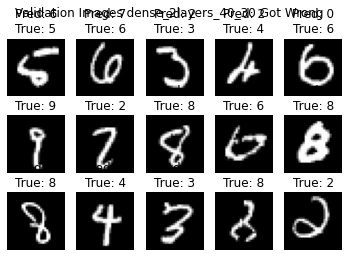

dense_2layers_40_35

Training loss: 0.05632844939827919
Training accuracy: 0.9836833477020264

Validation loss: 0.10531840473413467
Validation accuracy: 0.9699000120162964


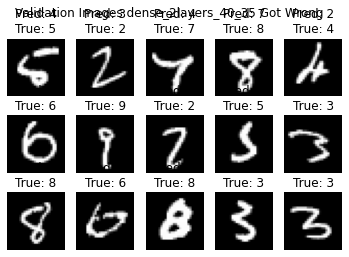

dense_2layers_40_40

Training loss: 0.0517621673643589
Training accuracy: 0.9844833612442017

Validation loss: 0.1038956418633461
Validation accuracy: 0.9699000120162964


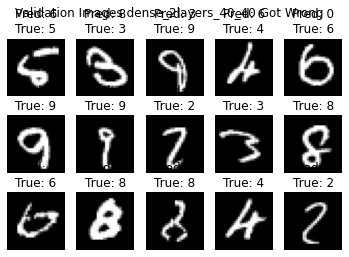

dense_2layers_50_25

Training loss: 0.052823130041360855
Training accuracy: 0.9842833280563354

Validation loss: 0.10236793756484985
Validation accuracy: 0.9684000015258789


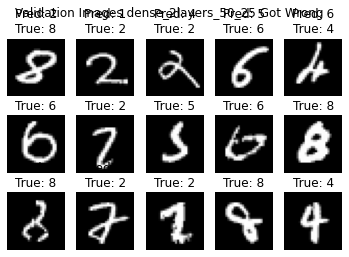

dense_2layers_50_30

Training loss: 0.05250157043337822
Training accuracy: 0.9840333461761475

Validation loss: 0.09780271351337433
Validation accuracy: 0.9704999923706055


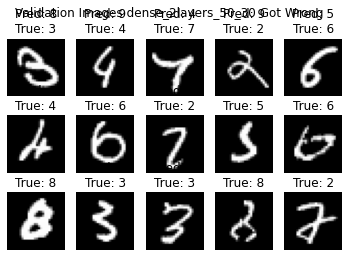

dense_2layers_50_35

Training loss: 0.046959806233644485
Training accuracy: 0.9854999780654907

Validation loss: 0.09347996860742569
Validation accuracy: 0.9713000059127808


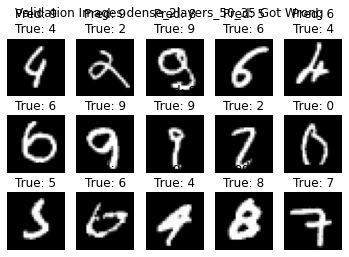

dense_2layers_50_40

Training loss: 0.04545791819691658
Training accuracy: 0.9868833422660828

Validation loss: 0.09440909326076508
Validation accuracy: 0.9718000292778015


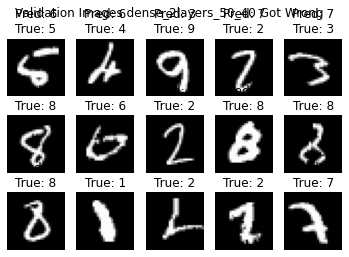

dense_2layers_55_25

Training loss: 0.05085964873433113
Training accuracy: 0.9850333333015442

Validation loss: 0.10066118091344833
Validation accuracy: 0.9703999757766724


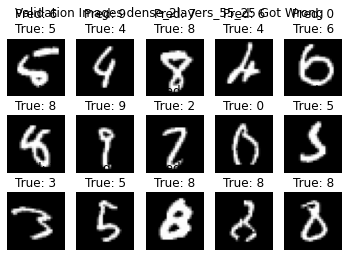

dense_2layers_55_30

Training loss: 0.05090053379535675
Training accuracy: 0.9841833114624023

Validation loss: 0.10584370046854019
Validation accuracy: 0.9689000248908997


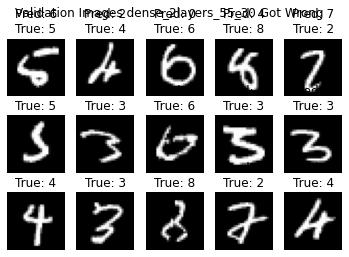

dense_2layers_55_35

Training loss: 0.044180192053318024
Training accuracy: 0.9869666695594788

Validation loss: 0.09846243262290955
Validation accuracy: 0.9703999757766724


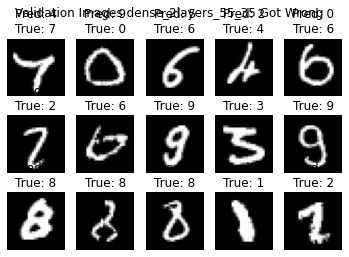

dense_2layers_55_40

Training loss: 0.04078192636370659
Training accuracy: 0.9882833361625671

Validation loss: 0.09253109991550446
Validation accuracy: 0.9732000231742859


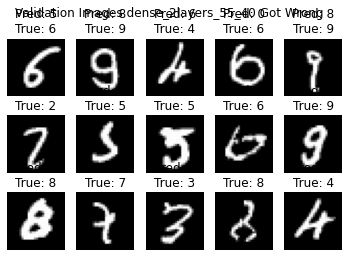

dense_2layers_70_25

Training loss: 0.04291573911905289
Training accuracy: 0.9865333437919617

Validation loss: 0.09920310229063034
Validation accuracy: 0.9711999893188477


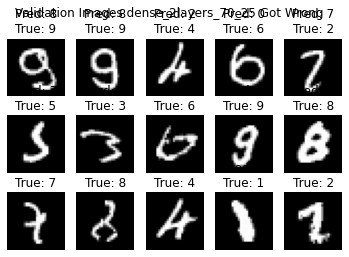

dense_2layers_70_30

Training loss: 0.030874747782945633
Training accuracy: 0.9908666610717773

Validation loss: 0.08360447734594345
Validation accuracy: 0.9753000140190125


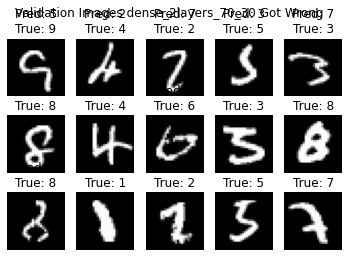

dense_2layers_70_35

Training loss: 0.03598155453801155
Training accuracy: 0.989549994468689

Validation loss: 0.09161985665559769
Validation accuracy: 0.9731000065803528


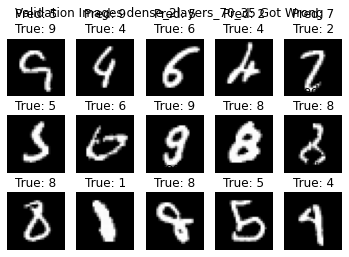

dense_2layers_70_40

Training loss: 0.03157488629221916
Training accuracy: 0.9905499815940857

Validation loss: 0.09046439826488495
Validation accuracy: 0.9742000102996826


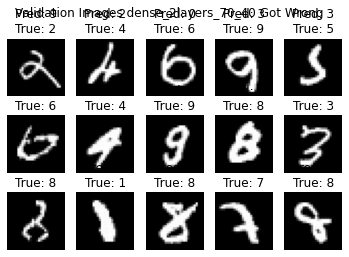

dense_2layers_200_400

Training loss: 0.015451752580702305
Training accuracy: 0.9945666790008545

Validation loss: 0.08425682038068771
Validation accuracy: 0.977400004863739


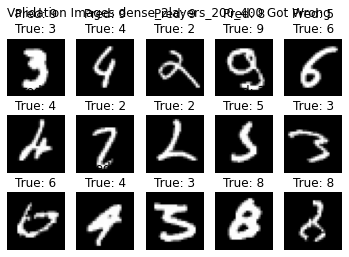

dense_2layers_400_800

Training loss: 0.010945369489490986
Training accuracy: 0.9962499737739563

Validation loss: 0.08199307322502136
Validation accuracy: 0.9815000295639038


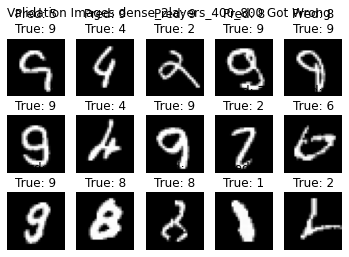

In [6]:
def main(model_name):
#     args = parse_args()
#     model_name = args.model_name

    # Remove src from cwd if necessary
    cwd = os.getcwd()
    if os.path.basename(cwd) == 'src': cwd = os.path.dirname(cwd)

    # Create img directory to save images if needed
    os.makedirs(os.path.join(cwd, 'img'), exist_ok=True)

    # Create model directory to save models if needed
    os.makedirs(os.path.join(cwd, 'model'), exist_ok=True)
    model_weights_fname = os.path.join(cwd, 'model', model_name + '.h5')
    model_json_fname = os.path.join(cwd, 'model', model_name + '.json')

    # Load model and its weights
    with open(model_json_fname, 'r') as f: model_json = f.read()
    model = model_from_json(model_json)
    model.load_weights(model_weights_fname)

    # Get MNIST data shaped appropriately for the model
    (X_train, y_train), (X_test, y_test) = get_data(model)

    # Compile model and evaluate its performance on training and test data
    model.compile(loss='categorical_crossentropy', optimizer='adam',
        metrics=['accuracy'])

    score = model.evaluate(X_train, y_train, verbose=0)
    print()
    print('Training loss:', score[0])
    print('Training accuracy:', score[1])

    score = model.evaluate(X_test, y_test, verbose=0)
    print()
    print('Validation loss:', score[0])
    print('Validation accuracy:', score[1])

    # Determine validation examples that the model got wrong
    y_pred = np.array([np.argmax(y) for y in model.predict(X_test)])
    y_true = np.array([np.argmax(y) for y in y_test])
    mistakes = (y_pred != y_true)
    X_wrong = X_test[mistakes].reshape(-1, 28, 28) # To visualize properly
    y_wrong = y_pred[mistakes]
    y_right = y_true[mistakes]

    # Visualize some of the validation examples the model got wrong
    nrow, ncol = 3, 5
    for i in range(nrow):
        for j in range(ncol):
            idx = i * ncol + j
            plt.subplot(nrow, ncol, idx + 1)
            plt.imshow(X_wrong[idx], cmap='gray')
            plt.title('Pred: %d\nTrue: %d' % (y_wrong[idx], y_right[idx]))
            plt.axis('off')

    plt.suptitle('Validation Images %s Got Wrong' % model_name)
    plt.savefig(os.path.join(cwd, 'img', '%s_mistakes.png') % model_name)
    plt.show()


for layer1 in [40, 50, 55, 70]:
    for layer2 in [25, 30, 35, 40]:
        model_name = f'dense_2layers_{layer1}_{layer2}'
        print(model_name)
        main(model_name)
        
model_name = f'dense_2layers_200_400'
print(model_name)
main(model_name)

model_name = f'dense_2layers_400_800'
print(model_name)
main(model_name)

model_name = f'dense_2layers_41_41'
print(model_name)
main(model_name)

dense_2layers_41_41

Training loss: 0.055957332253456116
Training accuracy: 0.9832166433334351

Validation loss: 0.09891247004270554
Validation accuracy: 0.9706000089645386


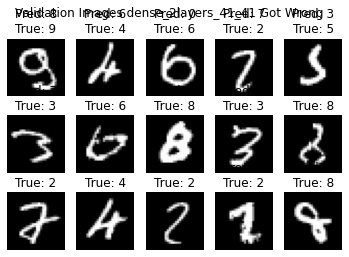

In [7]:
model_name = f'dense_2layers_41_41'
print(model_name)
main(model_name)